In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [3]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,555,607,665,714,784,840,906,933,996,1026
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,433,446,467,475,494,518,539,548,562,584
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,601,638,646,659,673,673,696,704,713,717
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,19,19,19,19,19,19,19,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,4,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [4]:
longdf = df.rename(columns={'Country/Region':'country'}).set_index('country', drop=True)
longdf = longdf.drop(columns=['Province/State','Lat','Long'])
longdf.columns.name = 'dates'
longdf

dates,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,555,607,665,714,784,840,906,933,996,1026
Albania,0,0,0,0,0,0,0,0,0,0,...,433,446,467,475,494,518,539,548,562,584
Algeria,0,0,0,0,0,0,0,0,0,0,...,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718
Andorra,0,0,0,0,0,0,0,0,0,0,...,601,638,646,659,673,673,696,704,713,717
Angola,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
France,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
South Sudan,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,4,6,6,6,6,6,6,6,6,6


In [5]:
longdf = longdf.stack()
longdf.name = 'cases'
print('stack all columns -> creates pd.Series:\n', longdf.head())

stack all columns -> creates pd.Series:
 country      dates  
Afghanistan  1/22/20    0
             1/23/20    0
             1/24/20    0
             1/25/20    0
             1/26/20    0
Name: cases, dtype: int64


In [6]:
longdf

country      dates  
Afghanistan  1/22/20    0
             1/23/20    0
             1/24/20    0
             1/25/20    0
             1/26/20    0
                       ..
Yemen        4/16/20    1
             4/17/20    1
             4/18/20    1
             4/19/20    1
             4/20/20    1
Name: cases, Length: 23760, dtype: int64

In [7]:
longdf = longdf.reset_index()

In [8]:
longdf

,country,dates,cases
0,Afghanistan,1/22/20,0
1,Afghanistan,1/23/20,0
2,Afghanistan,1/24/20,0
3,Afghanistan,1/25/20,0
4,Afghanistan,1/26/20,0
...,...,...,...
23755,Yemen,4/16/20,1
23756,Yemen,4/17/20,1
23757,Yemen,4/18/20,1
23758,Yemen,4/19/20,1


In [9]:
longdf.dtypes

country    object
dates      object
cases       int64
dtype: object

In [10]:
longdf['dates']=pd.to_datetime(longdf['dates']).astype('datetime64[D]')
longdf.dtypes

country            object
dates      datetime64[ns]
cases               int64
dtype: object

In [11]:
def align_dates(longdf):
    no_cases_exceed = 10
    min_date = (longdf['dates'][longdf['cases']>no_cases_exceed]).min()
    longdf['aligned_dates']=(longdf['dates'] - min_date).astype('timedelta64[D]')
    return longdf

new_longdf = longdf.groupby('country').apply(align_dates)
new_longdf
print(new_longdf.head())

       country      dates  cases  aligned_dates
0  Afghanistan 2020-01-22      0          -52.0
1  Afghanistan 2020-01-23      0          -51.0
2  Afghanistan 2020-01-24      0          -50.0
3  Afghanistan 2020-01-25      0          -49.0
4  Afghanistan 2020-01-26      0          -48.0


In [12]:
new_longdf

,country,dates,cases,aligned_dates
0,Afghanistan,2020-01-22,0,-52.0
1,Afghanistan,2020-01-23,0,-51.0
2,Afghanistan,2020-01-24,0,-50.0
3,Afghanistan,2020-01-25,0,-49.0
4,Afghanistan,2020-01-26,0,-48.0
...,...,...,...,...
23755,Yemen,2020-04-16,1,NaN
23756,Yemen,2020-04-17,1,NaN
23757,Yemen,2020-04-18,1,NaN
23758,Yemen,2020-04-19,1,NaN


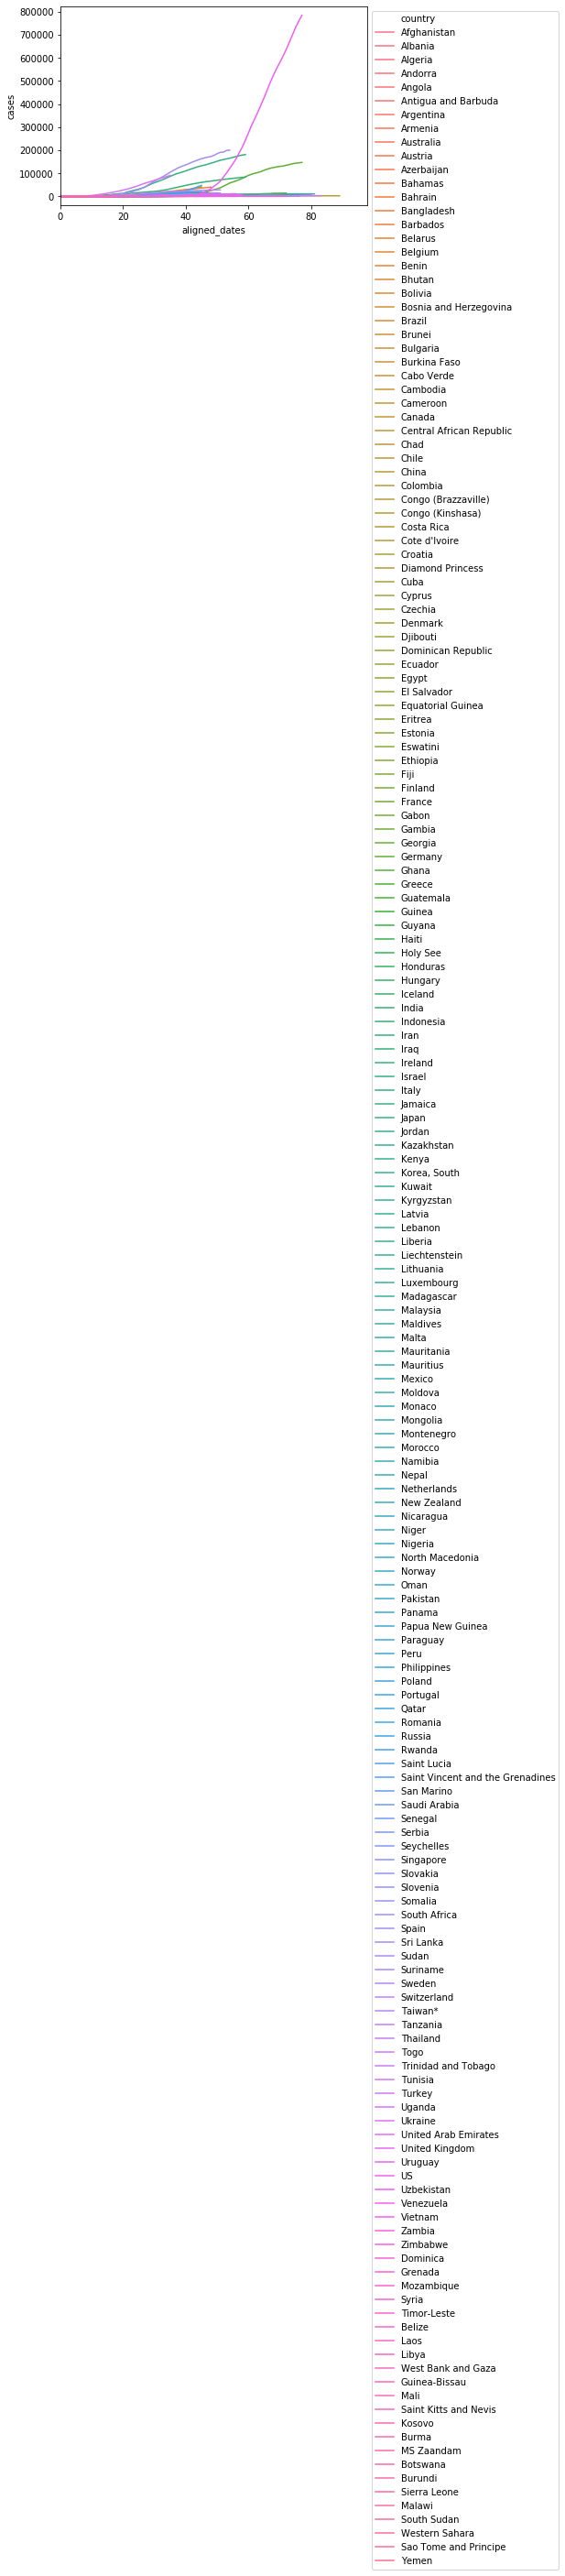

In [14]:
# now we can use seaborn simply to plot, seaborn loves this format
# since the legend is big there is also we can try to restrict to specific countries -> see below

ax = sns.lineplot(
    data=new_longdf, 
    x='aligned_dates', 
    y='cases', 
    hue='country', 
    ci=None, 
)

xlims = ax.get_xlim()
ax.set_xlim(0, xlims[1])
# this anchors the legend to the side
ax.legend(bbox_to_anchor=(1,1))
plt.show()

In [23]:
new_longdf_subset = new_longdf[new_longdf['country'].isin(['US', 'Germany', 'Peru', 'China', 'South Korea', 'France'])]

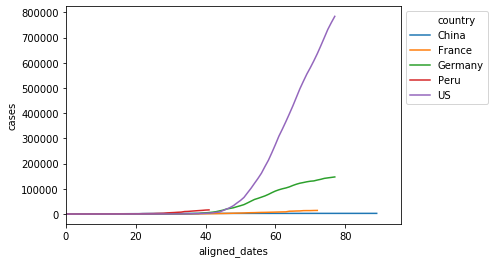

In [24]:
# now we can use seaborn simply to plot, seaborn loves this format
# since the legend is big there is also we can try to restrict to specific countries -> see below

ax = sns.lineplot(
    data=new_longdf_subset, 
    x='aligned_dates', 
    y='cases', 
    hue='country', 
    ci=None, 
)

xlims = ax.get_xlim()
ax.set_xlim(0, xlims[1])
# this anchors the legend to the side
ax.legend(bbox_to_anchor=(1,1))
plt.show()

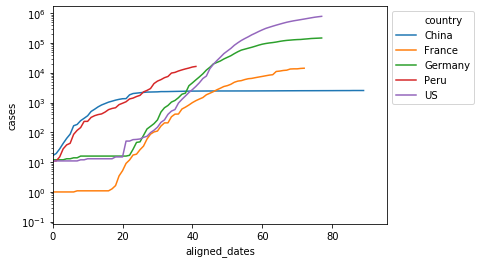

In [26]:
# now we can use seaborn simply to plot, seaborn loves this format
# since the legend is big there is also we can try to restrict to specific countries -> see below

ax = sns.lineplot(
    data=new_longdf_subset, 
    x='aligned_dates', 
    y='cases', 
    hue='country', 
    ci=None, 
)

xlims = ax.get_xlim()
ax.set_xlim(0, xlims[1])
# this anchors the legend to the side
ax.legend(bbox_to_anchor=(1,1))
ax.set_yscale('log')
plt.show()